In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn import datasets
from pprint import pprint
import datetime
%matplotlib inline 

In [2]:
data = pd.read_excel ('Social_Network_Ads.xlsx')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print("Shape of the dataset:",data.shape)

Shape of the dataset: (400, 5)


In [4]:
cols = data.columns.values
print("Columns in the dataset are",cols,"respectively")

Columns in the dataset are ['User ID ' 'Gender ' 'Age ' 'EstimatedSalary ' 'Purchased'] respectively


In [5]:
col_names = ['User_ID','Gender','Age','EstimatedSalary','Purchased']
data.columns = col_names

cols = data.columns.values
print("Columns in the dataset are",cols,"respectively")

Columns in the dataset are ['User_ID' 'Gender' 'Age' 'EstimatedSalary' 'Purchased'] respectively


In [6]:
#summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
numberic_col = data.select_dtypes(include=np.number)
non_numberic_col = data.select_dtypes(exclude=np.number)

numberic_col consists of data in numberic type and non_numberic_col consists of non-numberic type(Gender only)

In [8]:
data['Gender'].value_counts()

Female     204
Male       196
Name: Gender, dtype: int64

In [9]:
data.isnull().values.any()

False

It is clear that there is no missing value present

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [11]:
duplicate = data[data.duplicated()] 
print("There are",duplicate.shape[0],"duplicate Rows in the dataset.") 

There are 0 duplicate Rows in the dataset.


It is clear that there is also no duplicates value presents.

<b><h3>CORRELATION

<AxesSubplot:>

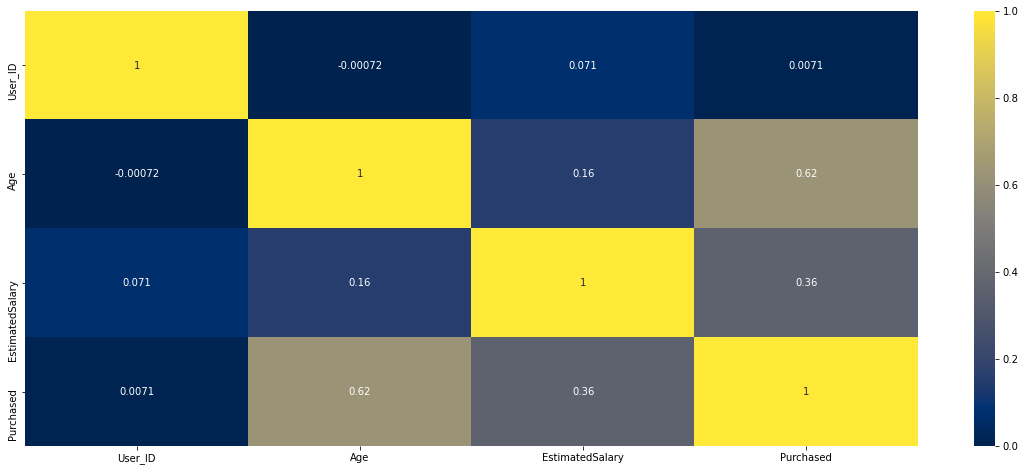

In [12]:
plt.figure(figsize=(20,8))
c = data.corr()
sns.heatmap(c,cmap="cividis",annot=True)

We can see that there is positive correlation between Age and purshased

<Figure size 1440x576 with 0 Axes>

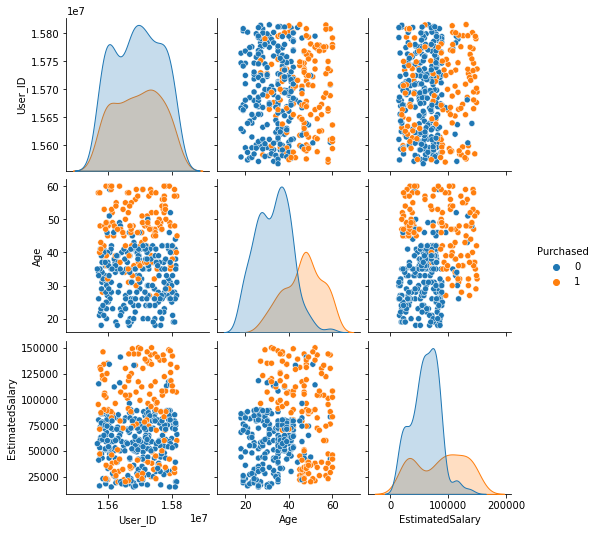

In [13]:
plt.figure(figsize=(20,8))
sns.pairplot(data,hue="Purchased")
plt.show()

<h3>DATA VISUALIZATION

In [14]:
income_count = pd.DataFrame(data['Purchased'].value_counts())
income_count['percentange'] = pd.DataFrame(data['Purchased'].value_counts()/len(data)*100)
income_count

,Purchased,percentange
0,257,64.25
1,143,35.75


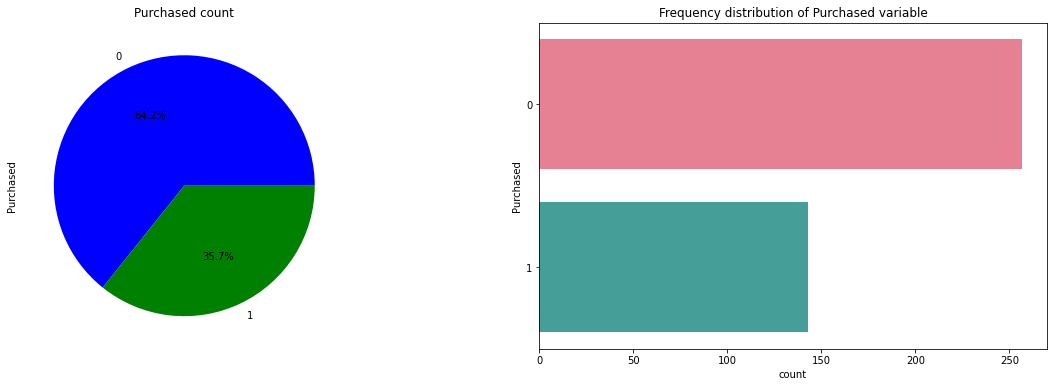

In [41]:
# visualize frequency distribution of Purchased variable

f,ax=plt.subplots(1,2,figsize=(20,6))

ax[0] = data['Purchased'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],colors=['blue','green'])
ax[0].set_title('Purchased count')

ax[1] = sns.countplot(y="Purchased", data=data, palette="husl")
ax[1].set_title("Frequency distribution of Purchased variable")

plt.show()

We can see that most of the people didn't purchased. 

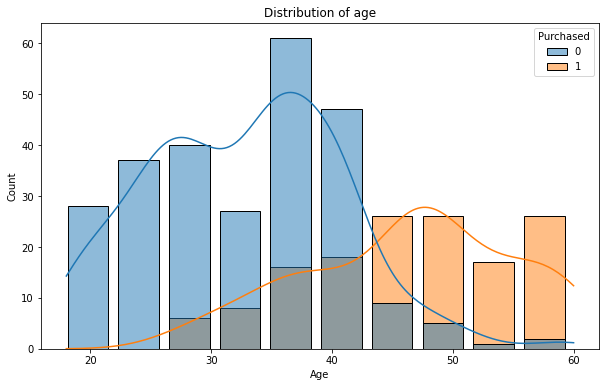

In [16]:
f, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=data, x="Age", hue="Purchased",kde=True,shrink=.8)
ax.set_title("Distribution of age")
plt.show()

We can see that person whose age is above 40 are more likely to purchase 

In [17]:
print("Average age for a person to purchase is",data.Age.mean())

Average age for a person to purchase is 37.655


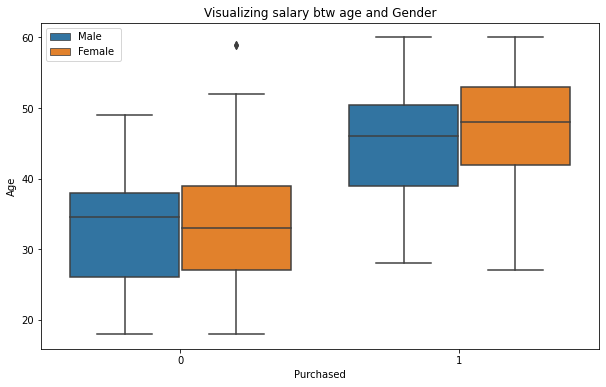

In [18]:
#Boxplot
f, ax = plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="Purchased", y="Age", hue="Gender", data=data,)
ax.set_title("Visualizing salary btw age and Gender")
ax.legend(loc='upper left')
plt.show()

Female whose age is above 40 are more likely to purchase

<b><h3>MODEL FITTING

<b>Feature Engineering

In [19]:
print("Categorical columns:")
for i in non_numberic_col.columns:
    print(i);

Categorical columns:
Gender


In [20]:
print("Numberical columns:")
for i in numberic_col.columns:
    print(i);

Numberical columns:
User_ID
Age
EstimatedSalary
Purchased


In [21]:
data["User_ID"].value_counts().mean()

1.0

It is clear that User_ID is just a set of unique values. It is recommended to remove these types of columns.

In [22]:
data.drop(columns="User_ID",inplace=True) 
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [23]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender']);

In [24]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


<b>Feature Selection and spilt

In [25]:
X = data.drop(['Purchased','Gender'], axis=1)
y = data['Purchased']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [27]:
print("Dimension of X_train and y_train:",X_train.shape)
print("Dimension of X_test and y_test:",X_test.shape)

Dimension of X_train and y_train: (300, 2)
Dimension of X_test and y_test: (100, 2)


In [28]:
#By using StandardScaler(), we can scale our data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train = np.asarray(X_train,dtype=np.float)
y_train = np.asarray(y_train,dtype=np.float)
X_train.dtype

dtype('float64')

<h3>LOGISTIC REGRESSION

In [30]:
#defining Logistic function
class logisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    #defining intercept for Hypothesis
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    #defining Sigmoid Func 
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    #defining loss function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization for gradient descent
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
    
    #probability that classifies each inout to a particular category(0,1) 
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

In [31]:
model = logisticRegression(lr=0.1, num_iter=100000)

In [32]:
model.fit(X_train,y_train)

In [33]:
#predict
preds = model.predict(X_test)

In [34]:
model.theta

array([-1.00335022,  2.26671113,  1.21344416])

In [35]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
print("Root Mean Square Error (RMSE)={:0.2f}.".format(rms))

Root Mean Square Error (RMSE)=0.33.


<b>Confusion Matrix

<AxesSubplot:>

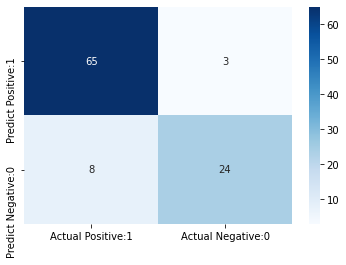

In [36]:
cm = confusion_matrix(y_test, preds)
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

So our Logistic model predicts:<br> 
74 as <b>True Positives</b><br>
8 as False Positives<br>
5 as  False Negatives<br>
33 as <b>True Negatives</b><br>

<b>Classification Report

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



In [38]:
metric = accuracy_score(y_test, preds)
print("Accuracy = {:0.2f}%".format(metric*100))

Accuracy = 89.00%


<h3>DECISION TREE CLASSIFIER

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<h3>VISUALIZING THE DATA

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


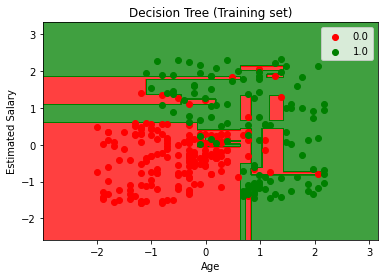

In [40]:
X_Values,y_Values=X_train,y_train

X1,X2=np.meshgrid(np.arange(start=X_Values[:,0].min()-1,stop=X_Values[:,0].max()+1,step=0.01),
                 np.arange(start=X_Values[:,1].min()-1,stop=X_Values[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,tree.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_Values)):
    plt.scatter(X_Values[y_Values==j,0],X_Values[y_Values==j,1],
               c=ListedColormap(('red','green'))(i),label=j)

    plt.title('Decision Tree (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()